# 第13章 集成学习与梯度提升决策树

## 习题1
以下关于集成学习的说法不正确的是：   
&emsp;A. 在集成学习中，我们可以为数据空间的不同区域使用不同的预测模型，再将预测结果进行组合。   
&emsp;B. 一组预测模型可以有多种方式进行集成学习。   
&emsp;C. 有效的集成学习需要集合中的模型具有单一性，最好将同一类型的预测模型结合起来。   
&emsp;D. 训练集成模型时，单个模型的参数不会随之更新。

**解答**

**不正确选项：C**

**解析：**

A.在集成学习中，我们可以为数据空间的不同区域使用不同的预测模型，再将预测结果进行组合。  

- 判断：对。

- 解析：集成学习的核心思想是通过组合多个模型来提升整体性能。例如，随机森林通过对数据和特征进行随机采样，每个决策树在不同的子空间中学习，相当于为数据空间的不同区域使用不同模型，最终通过投票或平均组合结果。

B.一组预测模型可以有多种方式进行集成学习。 

- 判断：对。

- 解析：文档中明确提到多种集成方法，如Bagging、随机森林、堆垛（Stacking）、提升算法（Boosting）等。同一组基础模型可以通过不同方式集成，例如Bagging使用自举采样，而随机森林进一步引入特征采样。

C.有效的集成学习需要集合中的模型具有单一性，最好将同一类型的预测模型结合起来。 

- 判断：错。

- 解析：文档指出：**Bagging**要求基础模型是同类型（如均为决策树），因其理论假设各模型的偏差和方差相同。而**堆垛（Stacking）**是允许基础学习器为不同类型（如KNN、随机森林、逻辑回归），通过元学习器组合结果。

因此，有效的集成学习并不强制要求模型单一性，选项C的表述错误。

D.训练集成模型时，单个模型的参数不会随之更新。 

- 判断：对。

- 解析：集成学习中，单个模型的参数在各自训练阶段确定，集成过程中不会更新。例如：
 （1）Bagging和随机森林的每个决策树独立训练，参数固定。
 （1）提升算法（如AdaBoost）的每个弱学习器基于调整后的权重训练，但参数仅在各自训练时更新，集成时不再修改。

## 习题2
以下关于提升算法的说法正确的是：   
&emsp;A. AdaBoost算法中，$err$绝对值越小的模型权重绝对值越大，在集成模型中占有主导地位。   
&emsp;B. AdaBoost算法中，需要按照之前学习器的结果对训练数据进行加权采样。   
&emsp;C. GBDT算法用到了“梯度反方向是函数值下降最快方向”的思想。   
&emsp;D. GBDT的正则化约束只考虑了叶节点的数目。

**解答**

**答案：A、B、C**

A.AdaBoost算法中，$err$绝对值越小的模型权重绝对值越大，在集成模型中占有主导地位。

- 判断:对。

- 解析：文档中明确提到，AdaBoost中弱分类器的权重公式为：
$$
\alpha = \frac{1}{2} \ln \left( \frac{1 - \text{err}}{\text{err}} \right)
$$
其中，$\text{err}$为加权错误率。当$\text{err}$越小时，$\alpha$的绝对值越大，说明该模型在集成中的权重越高，主导集成结果。例如，当$\text{err} = 0.3$时，$\alpha \approx 0.423$；当$\text{err} = 0.4$时，$\alpha \approx 0.193$。因此，**错误率越低的模型权重越大**。

B.AdaBoost算法中，需要按照之前学习器的结果对训练数据进行加权采样。

- 判断:对。

- 解析：AdaBoost的核心思想是通过调整样本权重，使得后续模型更关注之前预测错误的样本。具体步骤为：
1. 初始化所有样本权重为$1/N$。
2. 每轮迭代中，根据当前模型的错误率调整样本权重：
   $$
   w_{i}^{(t+1)} = w_{i}^{(t)} \cdot \exp\left( \alpha_t \cdot y_i \cdot f_t(x_i) \right)
   $$
   其中，$\alpha_t$为当前模型的权重，$y_i$为真实标签，$f_t(x_i)$为模型预测值。  
   因此，**样本权重与之前学习器的结果直接相关**。

C.GBDT算法用到了“梯度反方向是函数值下降最快方向”的思想。
- 判断:对。

- 解析：文档中指出，梯度提升决策树（GBDT）的核心思想是**通过梯度下降优化损失函数**。具体来说，每次迭代拟合的是当前模型残差的梯度方向（负梯度方向），因为梯度反方向是函数值下降最快的方向。例如，若损失函数为均方误差，残差即负梯度：
$$
\text{残差} = -\nabla L(y, f(x)) = y - f(x)
$$
因此，GBDT通过不断向梯度反方向拟合残差来提升模型性能。

D.GBDT的正则化约束只考虑了叶节点的数目。
- 判断:对。

- 解析：  文档中提到，GBDT的正则化包括两部分：
1. **叶节点数目约束**：通过参数（如`max_depth`、`min_samples_leaf`）限制树的复杂度。
2. **叶节点值的L2正则化**：在损失函数中添加惩罚项，例如：
   $$
   L = \sum_{i=1}^n \ell(y_i, f(x_i)) + \lambda \sum_{j=1}^T w_j^2
   $$
   其中，$w_j$为叶节点值，$\lambda$为正则化系数。  
   因此，**GBDT的正则化不仅考虑叶节点数目，还包括叶节点值的平方项**，选项D的描述不完整。

## 习题3
由基础学习器提取特征后再供给元学习器进一步学习，这一特征提取的思想在前面哪些章节也出现过？为什么合适的特征提取往往能提升算法的表现？

**解答**

**出现章节**

**1.** 第7章 双线性模型 
- 7.1 矩阵分解

**原文**：  

"MF模型利用矩阵分解的技巧完成了这一任务。设第$i$个用户的偏好向量是$u_i$，第$j$部电影的特征向量是$v_j$，其维度都是特征数$k$。MF假设用户$ i$对电影$j$的评分$r_{ij}$是用户偏好与电影特征的内积，即$r_{ij} = u_i^T v_j$。"

**2.** 第9章 卷积神经网络 

- 文章开头段

**原文**：  

- 在KNN一章中，我们已经完成了色彩风格迁移这样一个简单的图像任务。在过程中，我们依照KNN的思想，提取了图像的局部特征进行匹配。

**如有补充欢迎反馈！**

___
     
**提升算法表现的原因**

1. 减少噪声与冗余

- **噪声过滤**：原始数据常包含噪声（如传感器误差、测量干扰）和冗余特征（如重复或高度相关的变量）。特征提取通过降维（如PCA）或选择（如随机森林的特征采样）过滤无关信息，使模型专注于与目标变量相关的核心特征。

- **信息浓缩**：通过线性或非线性变换（如PCA、核方法）将高维数据投影到低维空间，保留数据的主要结构信息。

2. 降低维度灾难，缓解过拟合

- **维度灾难**：高维数据会导致模型参数爆炸（如线性回归的参数数量与维度成平方关系），并加剧过拟合风险。特征提取通过降维（如LDA）或特征选择（如GBDT的特征重要性筛选）降低维度，减少模型复杂度。

- **正则化效果**：特征提取（如Stacking中的基础模型输出特征）通过引入新的特征空间，隐式地对模型进行正则化。例如，Stacking中基础模型的预测概率作为元模型的输入，迫使元模型学习更鲁棒的模式（第13.2节）。

3. 增强特征表达能力，提供多角度信息

- **抽象特征生成**：通过非线性变换（如神经网络的中间层特征）或领域特定方法（如NLP中的词嵌入），特征提取能将原始数据转化为更抽象、更具判别性的特征。

- **集成特征增强**：在集成学习中，基础学习器的输出（如预测概率、类别标签）作为元学习器的输入特征，提供多角度的信息。


## 习题4
基于本章代码，尝试非线性的元分类器，如神经网络和决策树，观察原始数据拼接到新数据上的模型预测性能的改变。

**验证代码如下**

In [2]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.base import clone

# 自定义Stacking分类器（继承自文档代码）
class StackingClassifier:
    def __init__(self, classifiers, meta_classifier, concat_feature=False, kfold=5):
        self.classifiers = classifiers
        self.meta_classifier = meta_classifier
        self.concat_feature = concat_feature
        self.kf = KFold(n_splits=kfold)
        self.k_fold_classifiers = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.n_classes = np.unique(y).shape[0]
        features = X if self.concat_feature else np.zeros((n_samples, 0))
        
        for classifier in self.classifiers:
            self.k_fold_classifiers.append([])
            predict_proba = np.zeros((n_samples, self.n_classes))
            for train_idx, test_idx in self.kf.split(X):
                clf = clone(classifier)
                clf.fit(X[train_idx], y[train_idx])
                predict_proba[test_idx] = clf.predict_proba(X[test_idx])
                self.k_fold_classifiers[-1].append(clf)
            features = np.concatenate([features, predict_proba], axis=-1)
        
        self.meta_classifier.fit(features, y)

    def _get_features(self, X):
        features = X if self.concat_feature else np.zeros((X.shape[0], 0))
        for k_classifiers in self.k_fold_classifiers:
            k_feat = np.mean([clf.predict_proba(X) for clf in k_classifiers], axis=0)
            features = np.concatenate([features, k_feat], axis=-1)
        return features

    def predict(self, X):
        return self.meta_classifier.predict(self._get_features(X))

    def score(self, X, y):
        return self.meta_classifier.score(self._get_features(X), y)

# 生成数据集（与文档一致）
X, y = make_classification(
    n_samples=1000, n_features=16, n_informative=5,
    n_redundant=2, n_classes=2, flip_y=0.1, random_state=0
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 基础分类器（与文档一致）
base_models = [
    RandomForestClassifier(n_estimators=10, max_features='sqrt', random_state=0),
    KNeighborsClassifier(),
    LogisticRegression(solver='liblinear', multi_class='ovr', random_state=0)
]

# 测试不同元分类器和特征拼接策略
def test_meta_classifier(meta_clf, concat_feature=False):
    sc = StackingClassifier(base_models, meta_clf, concat_feature=concat_feature)
    sc.fit(X_train, y_train)
    return sc.score(X_test, y_test)

# 测试案例
test_cases = [
    ("逻辑回归（无拼接）", LogisticRegression(), False),
    ("逻辑回归（拼接）", LogisticRegression(), True),
    ("决策树（无拼接）", DecisionTreeClassifier(max_depth=3), False),
    ("决策树（拼接）", DecisionTreeClassifier(max_depth=3), True),
    ("神经网络（无拼接）", MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=200), False),
    ("神经网络（拼接）", MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=200), True)
]

# 运行测试
results = []
for name, meta_clf, concat in test_cases:
    score = test_meta_classifier(meta_clf, concat)
    results.append((name, score))

# 输出结果
for name, score in results:
    print(f"{name}: {score:.4f}")

C:\anaconda\envs\deeplearing\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


逻辑回归（无拼接）: 0.9100
逻辑回归（拼接）: 0.9050
决策树（无拼接）: 0.8950
决策树（拼接）: 0.8950
神经网络（无拼接）: 0.9100
神经网络（拼接）: 0.8650


C:\anaconda\envs\deeplearing\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## 习题5
在提升算法中，弱学习器的数量越多，元学习器的效果是否一定越好？调整AdaBoost和GBDT代码中弱学习器的数量，验证你的想法。

**解答**
在提升算法（如 AdaBoost 和 GBDT）中，弱学习器的数量并非越多越好。虽然增加弱学习器数量通常能提升模型在训练集上的拟合能力，但可能导致过拟合，使泛化性能下降。文档指出：
AdaBoost：过多弱学习器可能放大噪声的影响（第 13.3.1 节）。
GBDT：通过学习率和子采样等正则化手段，可缓解过拟合，但仍需平衡弱学习器数量（第 13.3.2 节）。

**验证代码如下**

C:\anaconda\envs\deeplearing\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\anaconda\envs\deeplearing\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\anaconda\envs\deeplearing\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\anaconda\envs\deeplearing\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\anaconda\envs\deeplearing\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\anaconda\env

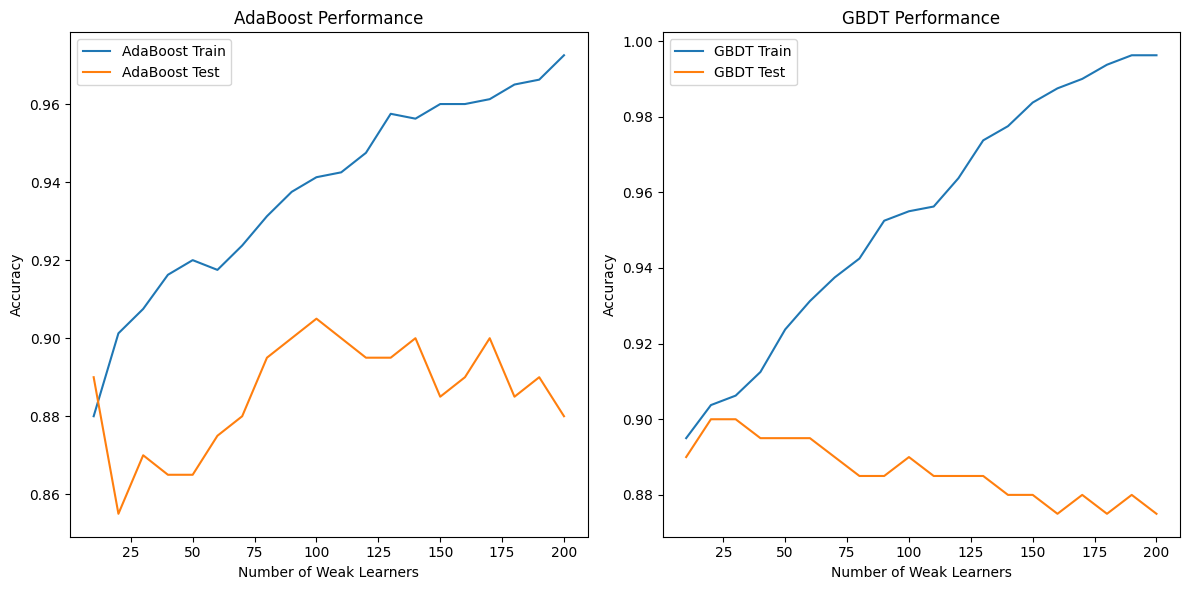

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# 生成数据集（与文档一致）
X, y = make_classification(
    n_samples=1000, n_features=16, n_informative=5,
    n_redundant=2, n_classes=2, flip_y=0.1, random_state=0
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 初始化弱分类器（决策树桩）
stump = DecisionTreeClassifier(max_depth=1, random_state=0)

# 测试AdaBoost
def test_adaboost(n_estimators):
    model = AdaBoostClassifier(
        base_estimator=stump,
        n_estimators=n_estimators,
        algorithm='SAMME.R',
        random_state=0
    )
    model.fit(X_train, y_train)
    return model.score(X_train, y_train), model.score(X_test, y_test)

# 测试GBDT
def test_gbdt(n_estimators):
    model = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=0.1,  # 较小的学习率防止过拟合
        max_depth=3,
        random_state=0
    )
    model.fit(X_train, y_train)
    return model.score(X_train, y_train), model.score(X_test, y_test)

# 调整弱学习器数量
n_estimators = np.arange(10, 201, 10)

# 运行测试
ada_train_scores, ada_test_scores = [], []
gbdt_train_scores, gbdt_test_scores = [], []

for n in n_estimators:
    # AdaBoost
    ada_train, ada_test = test_adaboost(n)
    ada_train_scores.append(ada_train)
    ada_test_scores.append(ada_test)
    
    # GBDT
    gbdt_train, gbdt_test = test_gbdt(n)
    gbdt_train_scores.append(gbdt_train)
    gbdt_test_scores.append(gbdt_test)

# 可视化结果
plt.figure(figsize=(12, 6))

# AdaBoost
plt.subplot(1, 2, 1)
plt.plot(n_estimators, ada_train_scores, label='AdaBoost Train')
plt.plot(n_estimators, ada_test_scores, label='AdaBoost Test')
plt.xlabel('Number of Weak Learners')
plt.ylabel('Accuracy')
plt.title('AdaBoost Performance')
plt.legend()

# GBDT
plt.subplot(1, 2, 2)
plt.plot(n_estimators, gbdt_train_scores, label='GBDT Train')
plt.plot(n_estimators, gbdt_test_scores, label='GBDT Test')
plt.xlabel('Number of Weak Learners')
plt.ylabel('Accuracy')
plt.title('GBDT Performance')
plt.legend()

plt.tight_layout()
plt.show()

## 习题6
基于xgboost库，对于本章涉及的回归任务，调试树的数量上限、每棵树的深度上限、学习率，观察其训练模型性能的改变，讨论是大量较浅的树组成的GBDT模型更强，还是少量的较深的树组成的GBDT模型更强。

**解答**  
GBDT 模型的性能由以下超参数共同决定：

**1.** 树的数量（n_estimators）：控制模型复杂度，数量越多拟合能力越强，但可能过拟合。

**2.** 树的深度（max_depth）：控制单棵树的复杂度，深度越深对局部模式的捕捉能力越强，但过拟合风险更高。

**3.** 学习率（learning_rate）：控制每棵树的贡献权重，较小的学习率需要更多树来达到相同效果，但可减少过拟合。

**验证代码如下**

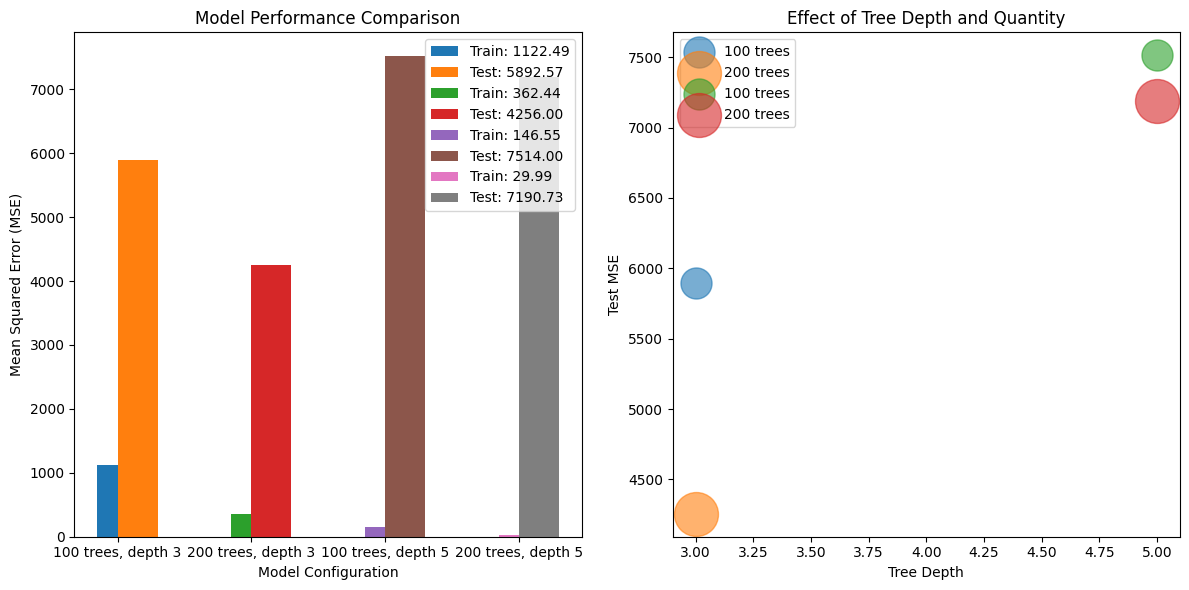

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import xgboost as xgb

# 生成数据集
X, y = make_regression(
    n_samples=1000, n_features=20, n_informative=10,
    noise=20, bias=100, random_state=0
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 定义参数组合
param_grid = [
    {"n_estimators": 100, "max_depth": 3},  # 少量浅树
    {"n_estimators": 200, "max_depth": 3},  # 大量浅树
    {"n_estimators": 100, "max_depth": 5},  # 少量深树
    {"n_estimators": 200, "max_depth": 5}   # 大量深树
]

# 训练并评估模型
def evaluate_model(params):
    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        learning_rate=0.1,
        n_jobs=-1,
        random_state=0,
        **params
    )
    model.fit(X_train, y_train)
    train_mse = np.mean((model.predict(X_train) - y_train)**2)
    test_mse = np.mean((model.predict(X_test) - y_test)**2)
    return train_mse, test_mse

# 运行实验
results = []
for params in param_grid:
    train_mse, test_mse = evaluate_model(params)
    results.append({
        "params": params,
        "train_mse": train_mse,
        "test_mse": test_mse
    })

# 可视化结果
plt.figure(figsize=(12, 6))

# 绘制训练集和测试集MSE对比
plt.subplot(1, 2, 1)
for res in results:
    params = res["params"]
    label = f"{params['n_estimators']} trees, depth {params['max_depth']}"
    plt.bar(label, res["train_mse"], width=0.3, label=f'Train: {res["train_mse"]:.2f}', align='center')
    plt.bar(label, res["test_mse"], width=0.3, label=f'Test: {res["test_mse"]:.2f}', align='edge')
plt.xlabel('Model Configuration')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Model Performance Comparison')
plt.legend()

# 绘制树深度与测试MSE的关系
plt.subplot(1, 2, 2)
for res in results:
    params = res["params"]
    plt.scatter(params["max_depth"], res["test_mse"], 
                s=params["n_estimators"]*5, alpha=0.6,
                label=f"{params['n_estimators']} trees")
plt.xlabel('Tree Depth')
plt.ylabel('Test MSE')
plt.title('Effect of Tree Depth and Quantity')
plt.legend()

plt.tight_layout()
plt.show()